----
- **Import libraries**: Use `numpy`, `pandas`, `matplotlib`, and `sklearn` for data handling, visualization, and machine learning.  
- **Set a random seed**: `random = 15` ensures reproducibility.  
- **Load the dataset**: Read `spambase_augmented.csv` into a Pandas DataFrame.  
- **Shuffle the data**: Randomly reorder the dataset while maintaining the same indices.  
- **Split features and target**:  
  - `X` contains all columns except the last (features).  
  - `y` contains only the last column (target labels).  
- **Perform train-test split**:  
  - 80% of the data is used for training.  
  - 20% is reserved for testing.  
  - Stratified sampling ensures class distribution is preserved.  
- **Further split the training data**:  
  - 80% of the training set is used for actual training.  
  - 20% is reserved for validation.  
  - Again, stratified sampling maintains class balance.  


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

random = 15

# Load and shuffle the dataset
file_path = 'spambase_augmented.csv'
data = pd.read_csv(file_path)
shuffled_data = data.sample(frac=1, random_state=random).reset_index(drop=True)

# Split into features (X) and target (y)
X = shuffled_data.iloc[:, :-1]
y = shuffled_data.iloc[:, -1]

# Split data into training, validation, and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=random)
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=random)

# Combine features and target for training and testing datasets
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

# Save the training and testing datasets to CSV files
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

----
- **Train two Decision Tree classifiers**:  
  - One using the **Gini** impurity criterion.  
  - One using the **Entropy** criterion.  

- **Evaluate both models**:  
  - Predict labels on the training and test sets.  
  - Compute **training and testing errors** using accuracy scores.  

- **Output training and testing errors**:  
  - Display error rates for both models.  

- **Visualize the decision trees**:  
  - Plot the **unpruned Decision Tree** for both Gini and Entropy criteria.  
  - Use `plot_tree` to display the structure of the trees.  


Unpruned Decision Trees:
Gini Criterion - Training Error: 0.0005, Testing Error: 0.0859
Entropy Criterion - Training Error: 0.0005, Testing Error: 0.0783


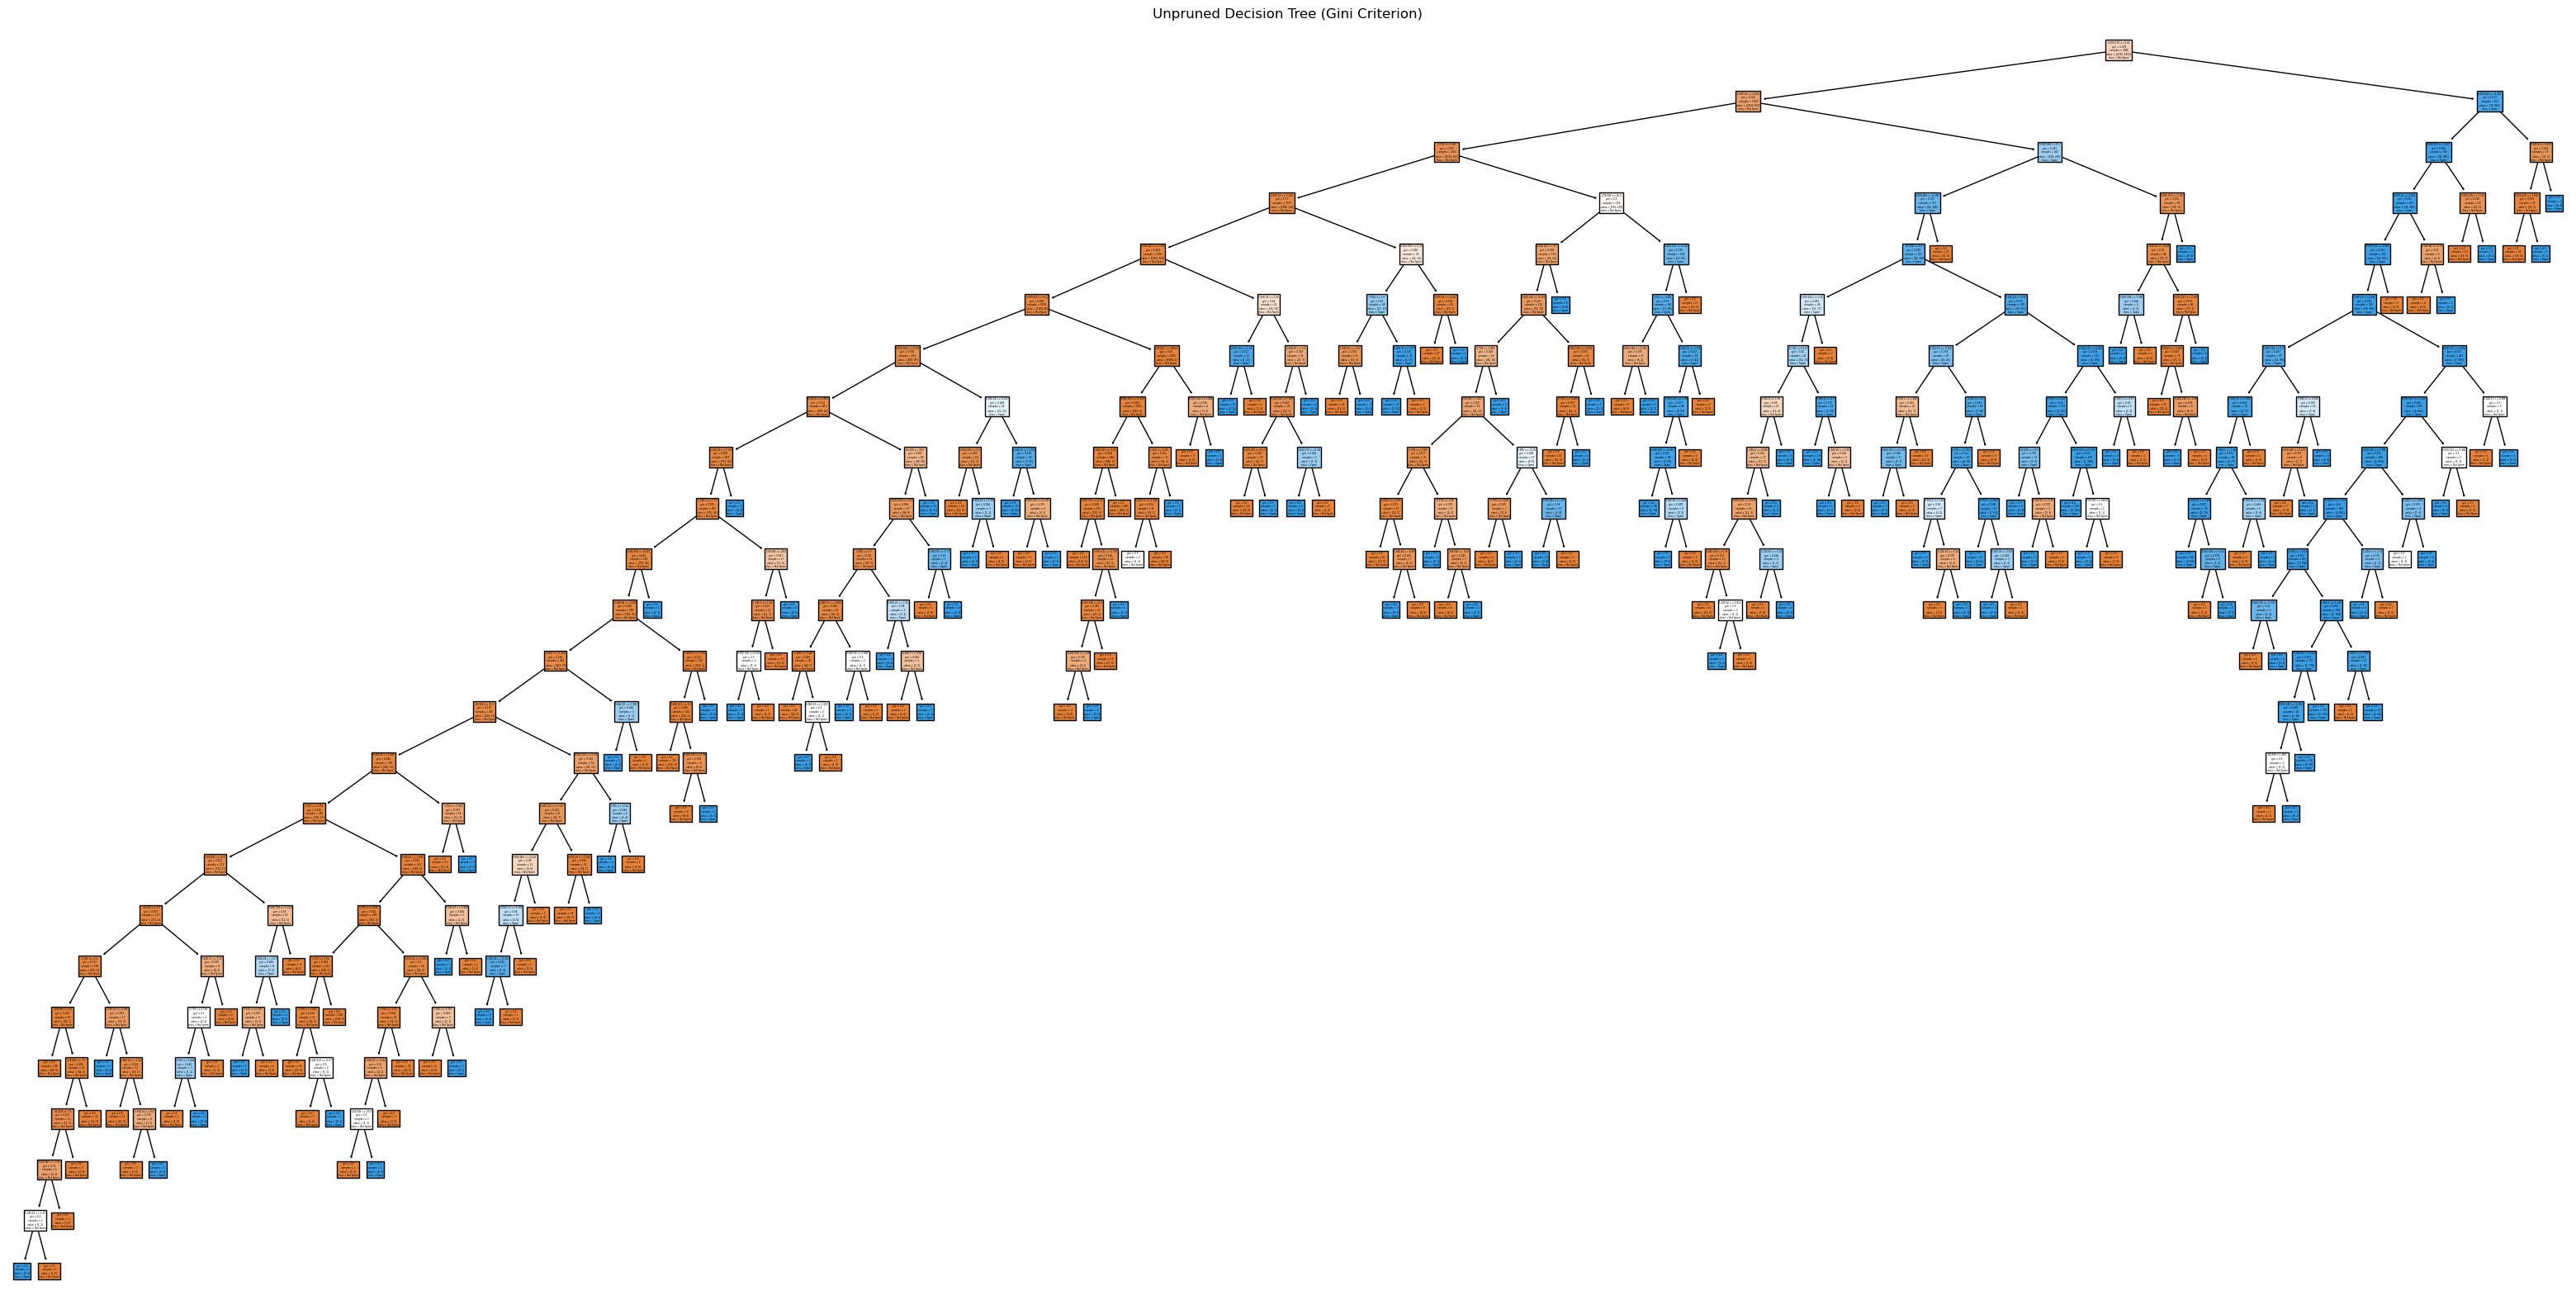

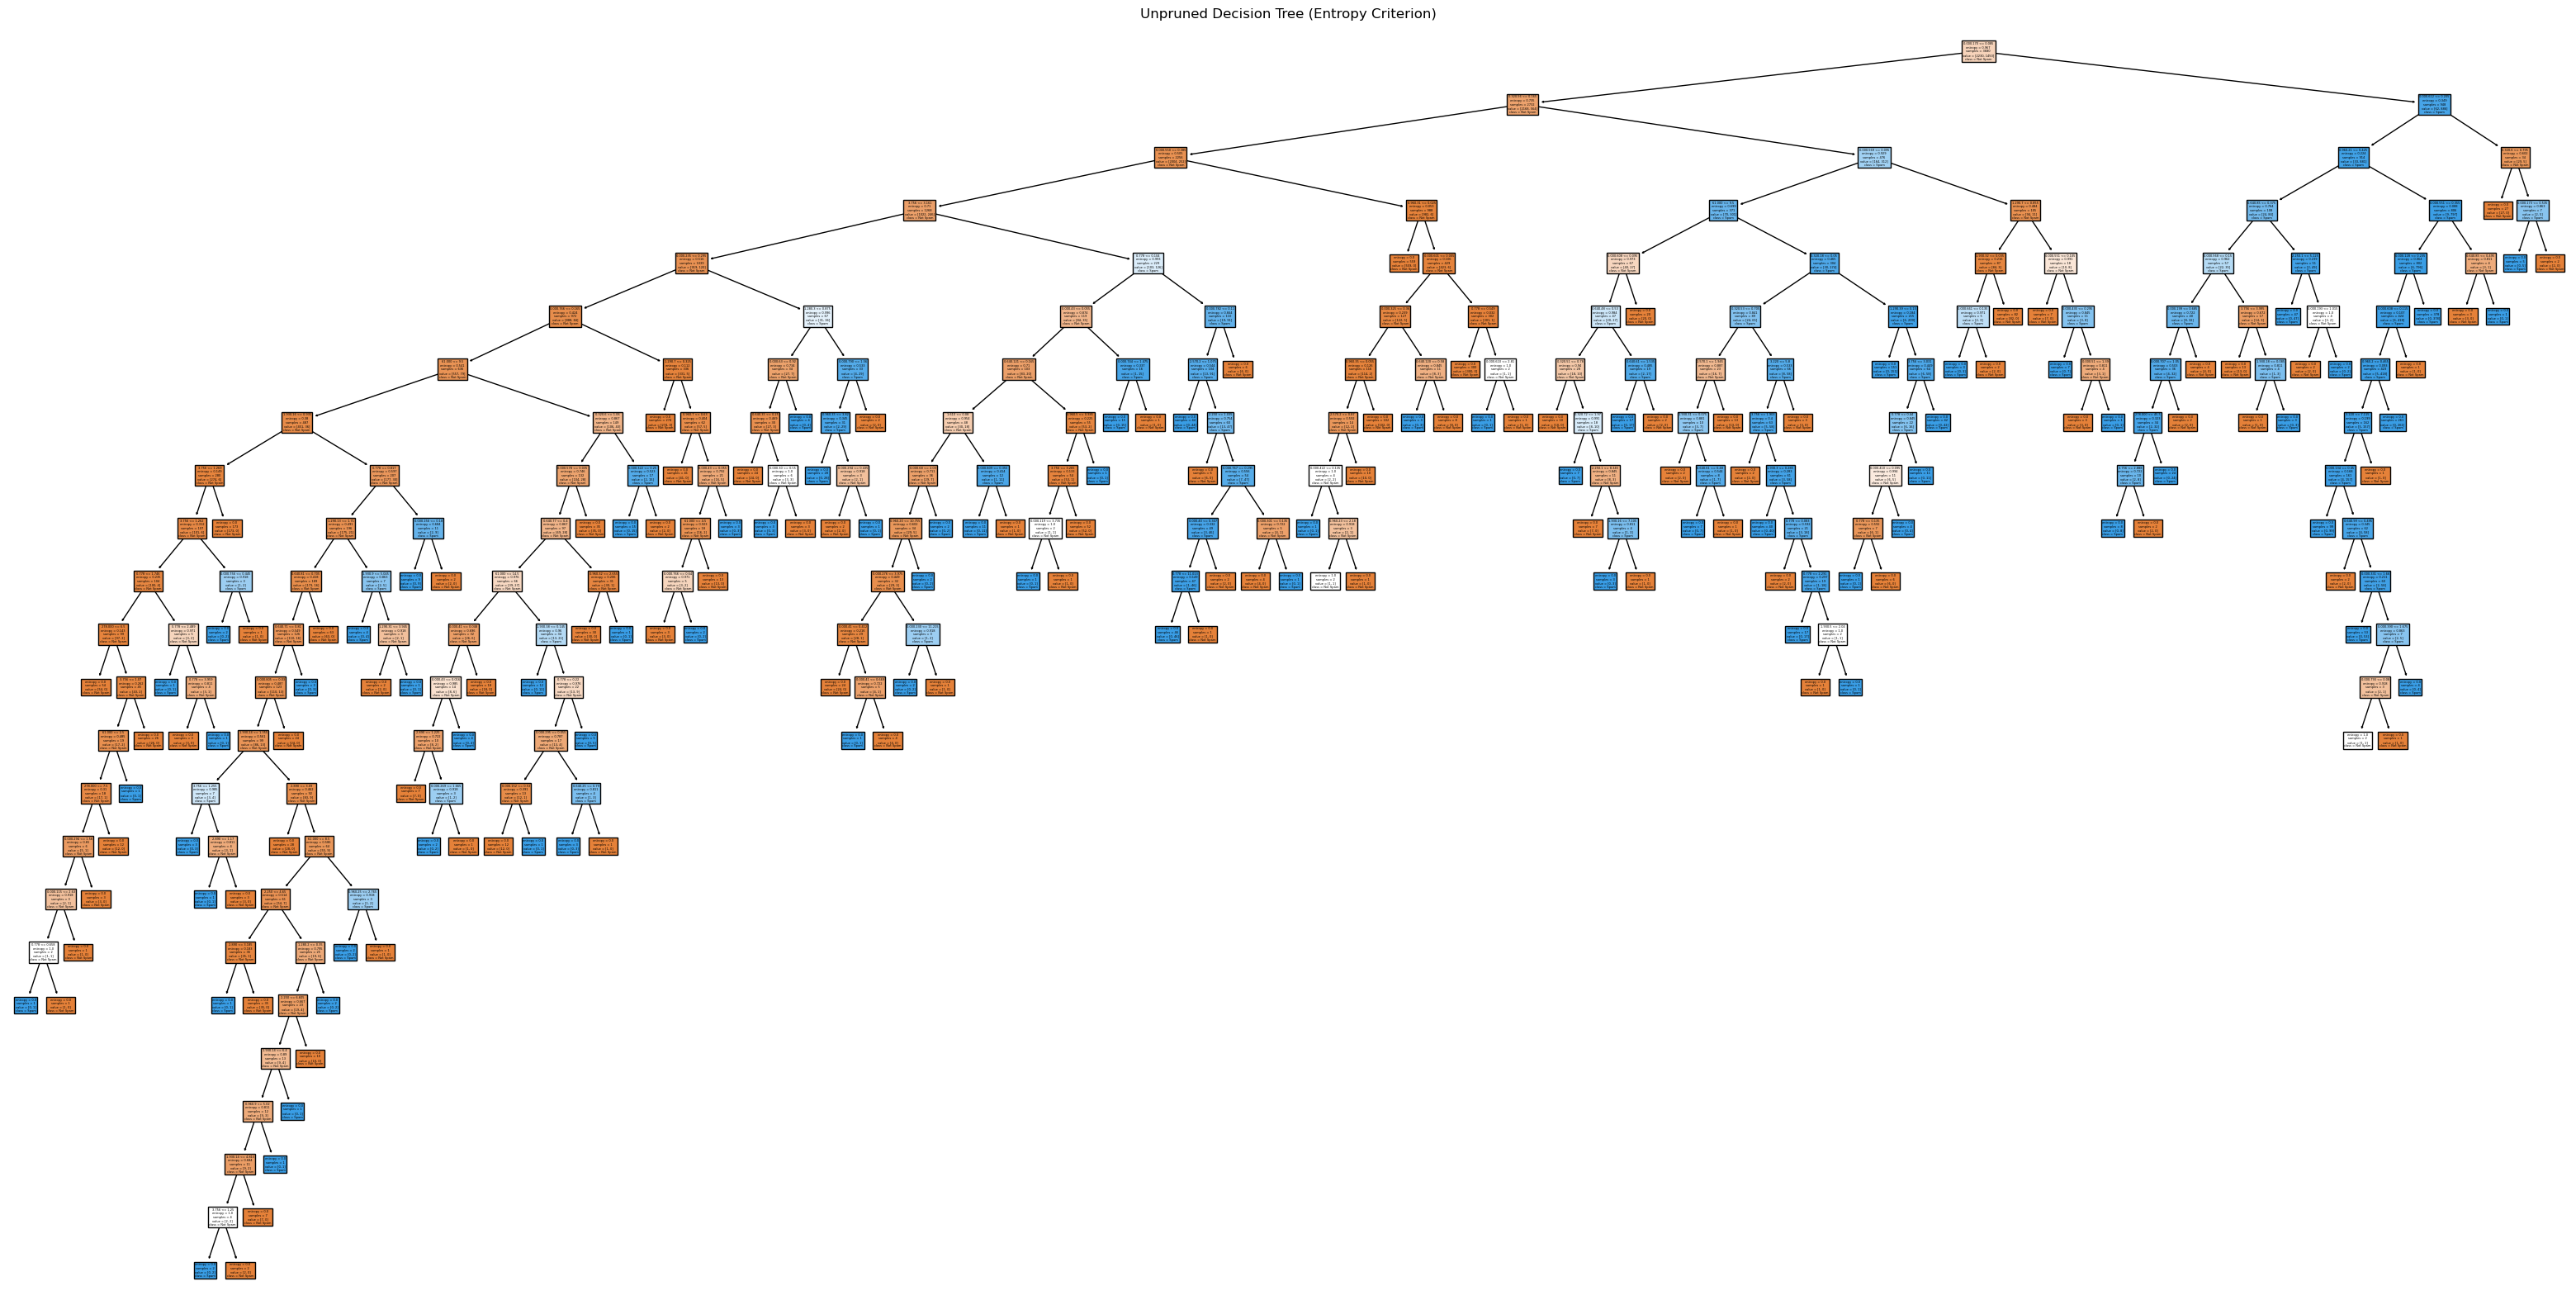

In [10]:
# Train a decision tree classifier with the Gini criterion
dt_gini = DecisionTreeClassifier(random_state=random, criterion="gini")
dt_gini.fit(X_train, y_train)

# Train a decision tree classifier with the Entropy criterion
dt_entropy = DecisionTreeClassifier(random_state=random, criterion="entropy")
dt_entropy.fit(X_train, y_train)

# Evaluate the Gini decision tree
y_train_pred_gini = dt_gini.predict(X_train)
y_test_pred_gini = dt_gini.predict(X_test)
train_error_gini = 1 - accuracy_score(y_train, y_train_pred_gini)
test_error_gini = 1 - accuracy_score(y_test, y_test_pred_gini)

# Evaluate the Entropy decision tree
y_train_pred_entropy = dt_entropy.predict(X_train)
y_test_pred_entropy = dt_entropy.predict(X_test)
train_error_entropy = 1 - accuracy_score(y_train, y_train_pred_entropy)
test_error_entropy = 1 - accuracy_score(y_test, y_test_pred_entropy)

# Output the training and testing errors
print("Unpruned Decision Trees:")
print(f"Gini Criterion - Training Error: {train_error_gini:.4f}, Testing Error: {test_error_gini:.4f}")
print(f"Entropy Criterion - Training Error: {train_error_entropy:.4f}, Testing Error: {test_error_entropy:.4f}")

# Plot the unpruned decision tree for Gini
plt.figure(figsize=(40, 20))
plot_tree(dt_gini, filled=True, feature_names=X_train.columns.tolist(), class_names=["Not Spam", "Spam"])
plt.title("Unpruned Decision Tree (Gini Criterion)")
plt.show()

# Plot the unpruned decision tree for Entropy
plt.figure(figsize=(40, 20))
plot_tree(dt_entropy, filled=True, feature_names=X_train.columns.tolist(), class_names=["Not Spam", "Spam"])
plt.title("Unpruned Decision Tree (Entropy Criterion)")
plt.show()


----
- **Initialize lists**:  
  - Store training and test errors for Decision Trees with Gini and Entropy criteria.  
  - Iterate over **max depths from 1 to 20**.  

- **Train Decision Trees with varying depths**:  
  - Fit a **Gini-based** Decision Tree for each depth and records errors.  
  - Fit an **Entropy-based** Decision Tree for each depth and records errors.  

- **Compute errors**:  
  - Predict on training and test sets.  
  - Store training and test errors for both models.  

- **Plot error trends**:  
  - Compare **training and test errors** for Gini and Entropy as depth increases.  
  - Help visualize **overfitting** (low training error, high test error at large depths).  
  - Add titles, labels, and legends for clarity.  


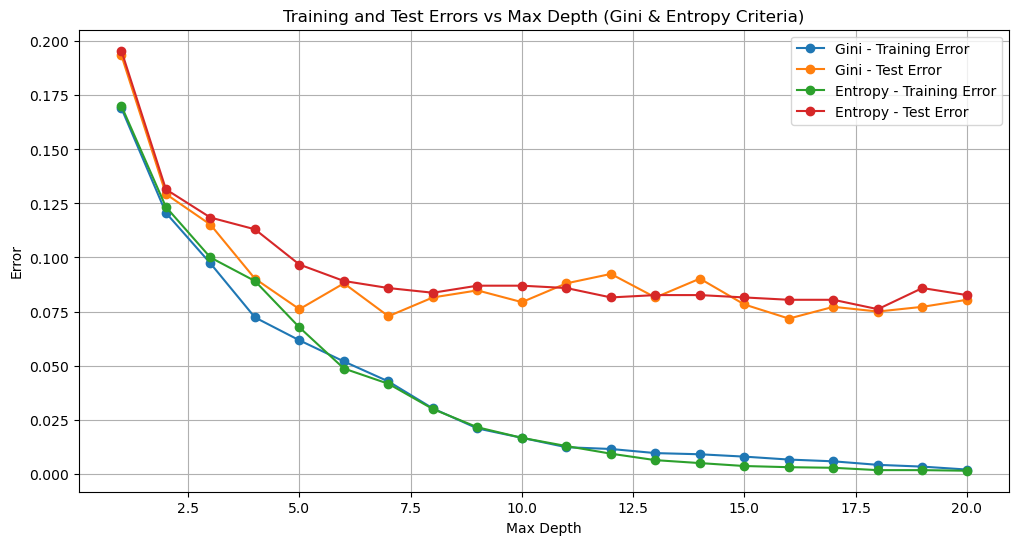

In [11]:
# Initialize lists to store errors for each max depth
max_depths = range(1, 21)  # Test max depths from 1 to 20
train_errors_gini = []
test_errors_gini = []
train_errors_entropy = []
test_errors_entropy = []

# Loop through each max depth
for depth in max_depths:
    # Train Gini criterion decision tree
    dt_gini = DecisionTreeClassifier(criterion="gini", max_depth=depth, random_state=random)
    dt_gini.fit(X_train, y_train)
    y_train_pred_gini = dt_gini.predict(X_train)
    y_test_pred_gini = dt_gini.predict(X_test)
    train_errors_gini.append(1 - accuracy_score(y_train, y_train_pred_gini))
    test_errors_gini.append(1 - accuracy_score(y_test, y_test_pred_gini))

    # Train Entropy criterion decision tree
    dt_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=depth, random_state=random)
    dt_entropy.fit(X_train, y_train)
    y_train_pred_entropy = dt_entropy.predict(X_train)
    y_test_pred_entropy = dt_entropy.predict(X_test)
    train_errors_entropy.append(1 - accuracy_score(y_train, y_train_pred_entropy))
    test_errors_entropy.append(1 - accuracy_score(y_test, y_test_pred_entropy))


# Plot the training and test errors for Gini and Entropy criteria
plt.figure(figsize=(12, 6))

# Gini Errors
plt.plot(max_depths, train_errors_gini, label="Gini - Training Error", marker='o')
plt.plot(max_depths, test_errors_gini, label="Gini - Test Error", marker='o')

# Entropy Errors
plt.plot(max_depths, train_errors_entropy, label="Entropy - Training Error", marker='o')
plt.plot(max_depths, test_errors_entropy, label="Entropy - Test Error", marker='o')

# Plot details
plt.title("Training and Test Errors vs Max Depth (Gini & Entropy Criteria)")
plt.xlabel("Max Depth")
plt.ylabel("Error")
plt.legend()
plt.grid(True)
plt.show()

----
- **Identify the optimal max depth**:  
  - Find the depth that results in the **lowest test error** for both Gini and Entropy-based Decision Trees.  
  - Print the optimal depths and corresponding minimum test errors.  

- **Train optimized Decision Trees**:  
  - Re-train a **Gini-based** Decision Tree using the optimal depth.  
  - Re-train an **Entropy-based** Decision Tree using the optimal depth.  

- **Visualize the optimized trees**:  
  - Plot the **optimized Gini Decision Tree** with the best depth.  
  - Plot the **optimized Entropy Decision Tree** with the best depth.  
  - Add titles and labels for clarity.  


Optimal max depth for Gini: 16
Best test error for Gini: 0.0717 at max depth 16


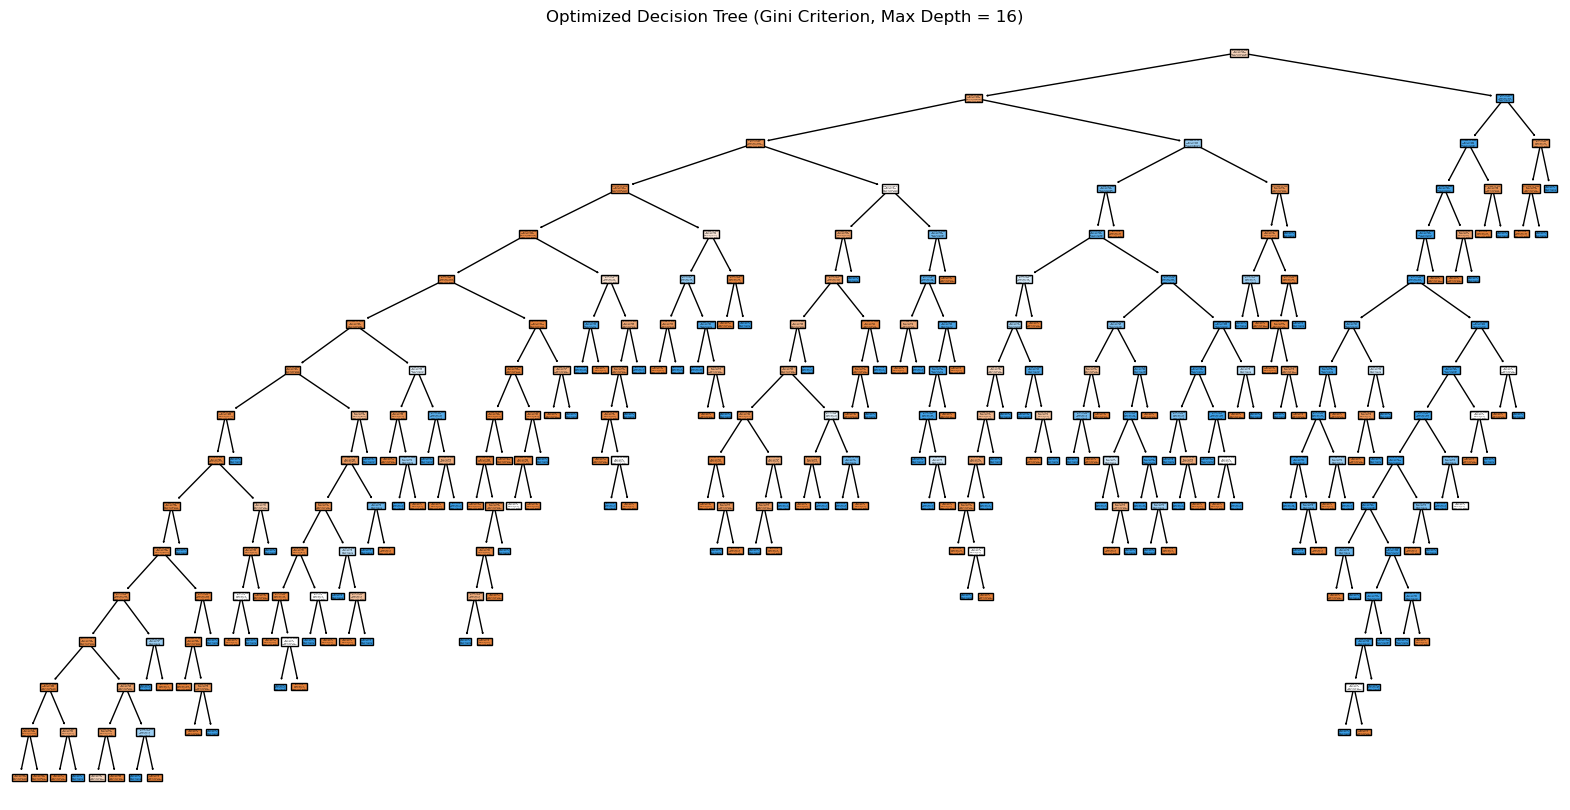

Optimal max depth for Entropy: 18
Best test error for Entropy: 0.0761 at max depth 18


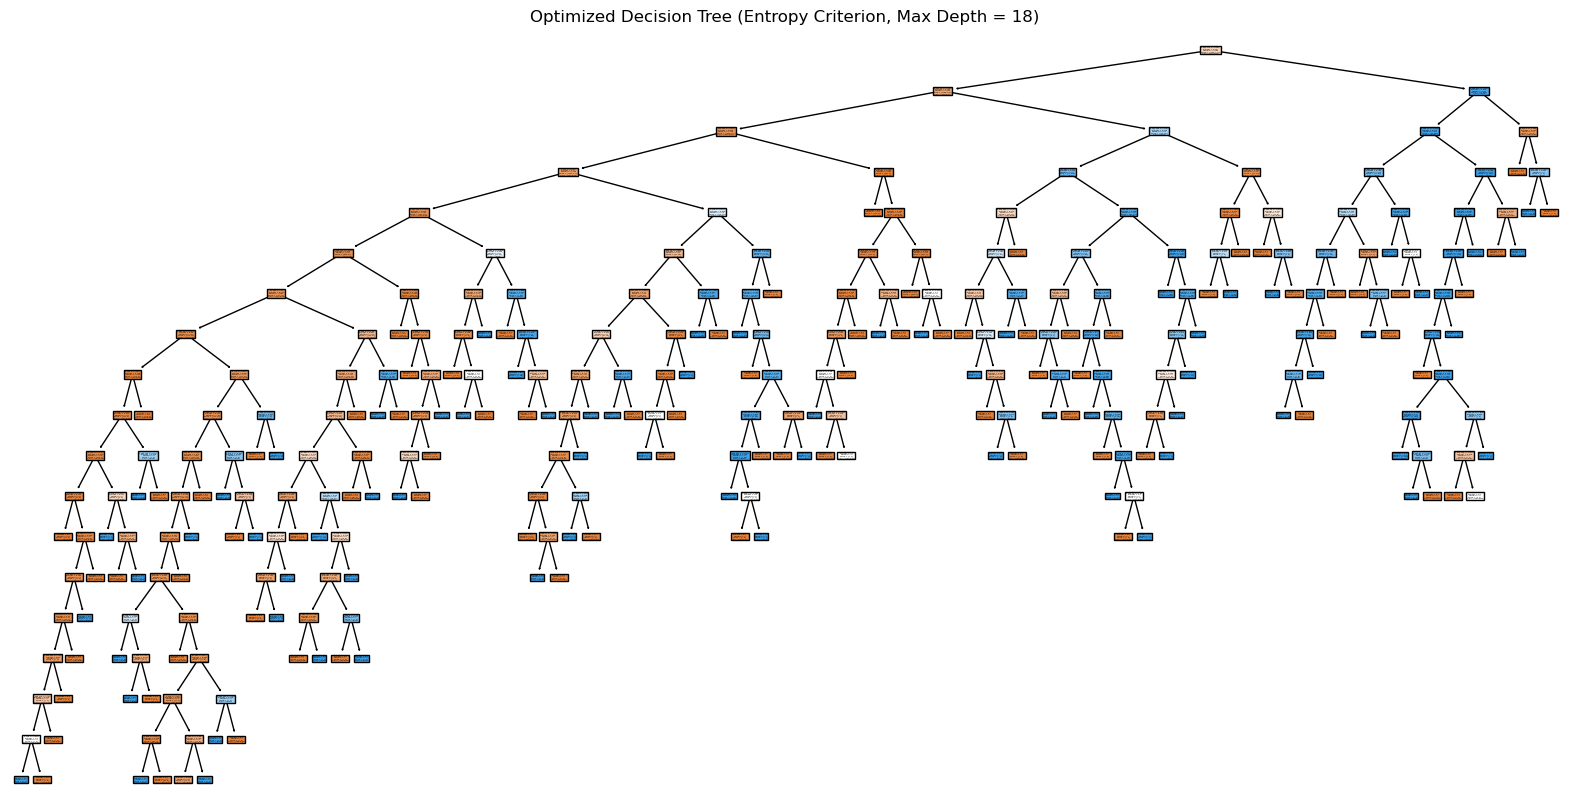

In [12]:
# Identify the optimal max depth based on the minimum test error
optimal_depth_gini = max_depths[np.argmin(test_errors_gini)]
optimal_depth_entropy = max_depths[np.argmin(test_errors_entropy)]

best_error_gini = min(test_errors_gini)  # Minimum test error for Gini
best_error_entropy = min(test_errors_entropy)  # Minimum test error for Entropy

# Train the decision trees using the optimal max depths
optimized_dt_gini = DecisionTreeClassifier(criterion="gini", max_depth=optimal_depth_gini, random_state=random)
optimized_dt_gini.fit(X_train, y_train)

optimized_dt_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=optimal_depth_entropy, random_state=random)
optimized_dt_entropy.fit(X_train, y_train)

print(f"Optimal max depth for Gini: {optimal_depth_gini}")
print(f"Best test error for Gini: {best_error_gini:.4f} at max depth {optimal_depth_gini}")

# Plot the optimized Gini decision tree
plt.figure(figsize=(20, 10))
plot_tree(optimized_dt_gini, filled=True, feature_names=X_train.columns.tolist(), class_names=["Not Spam", "Spam"])
plt.title(f"Optimized Decision Tree (Gini Criterion, Max Depth = {optimal_depth_gini})")
plt.show()

print(f"Optimal max depth for Entropy: {optimal_depth_entropy}")
print(f"Best test error for Entropy: {best_error_entropy:.4f} at max depth {optimal_depth_entropy}")

# Plot the optimized Entropy decision tree
plt.figure(figsize=(20, 10))
plot_tree(optimized_dt_entropy, filled=True, feature_names=X_train.columns.tolist(), class_names=["Not Spam", "Spam"])
plt.title(f"Optimized Decision Tree (Entropy Criterion, Max Depth = {optimal_depth_entropy})")
plt.show()


----
- **Define training data percentages**:  
  - Test different percentages of the training data (5% to 100%).  

- **Initialize error tracking**:  
  - Store training and test errors for **Gini** and **Entropy** criteria.  
  - Track the best percentage that minimizes test error.  

- **Loop through each percentage**:  
  - Randomly sample the specified percentage of training data.  
  - Train a **Decision Tree (Gini criterion)** on the sampled data.  
  - Evaluate training and test errors for Gini.  
  - Update the best percentage if a lower test error is found.  
  - Repeat the process for a **Decision Tree (Entropy criterion)**.  

- **Plot error trends**:  
  - Visualize how training and test errors change with different training data percentages.  
  - Compare **Gini vs. Entropy** criteria.  

- **Output the best training data percentage**:  
  - Print the **optimal percentage** that results in the lowest test error for both Gini and Entropy models.  


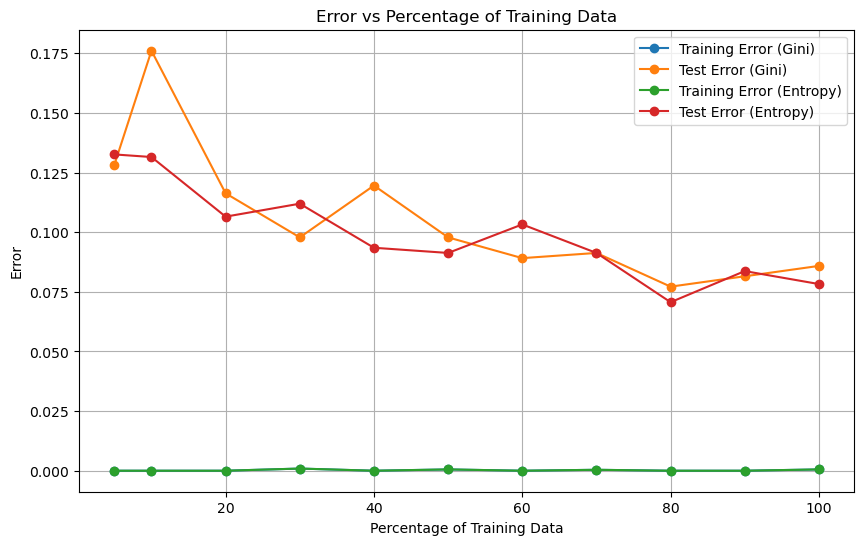

Best percentage for Gini: 80% with test error: 0.0772
Best percentage for Entropy: 80% with test error: 0.0707


In [13]:
# Define percentages of training data to use
percentages = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Store errors for Gini and Entropy criteria
train_errors_gini = []
test_errors_gini = []
train_errors_entropy = []
test_errors_entropy = []

# Variables to track the best percentages
best_percentage_gini = None
best_test_error_gini = float('inf')
best_percentage_entropy = None
best_test_error_entropy = float('inf')

# Random seed for reproducibility
np.random.seed(42)

# Loop through percentages
for pct in percentages:
    # Calculate the number of samples for the given percentage
    num_samples = int(len(X_train) * pct / 100)
    
    # Randomly sample the training data
    sampled_indices = np.random.choice(len(X_train), num_samples, replace=False)
    X_train_sampled = X_train.iloc[sampled_indices]
    y_train_sampled = y_train.iloc[sampled_indices]
    
    # Train decision tree with Gini criterion
    dt_gini = DecisionTreeClassifier(criterion="gini", random_state=random)
    dt_gini.fit(X_train_sampled, y_train_sampled)
    train_pred_gini = dt_gini.predict(X_train_sampled)
    test_pred_gini = dt_gini.predict(X_test)
    train_error_gini = 1 - accuracy_score(y_train_sampled, train_pred_gini)
    test_error_gini = 1 - accuracy_score(y_test, test_pred_gini)
    train_errors_gini.append(train_error_gini)
    test_errors_gini.append(test_error_gini)
    
    # Update the best percentage for Gini
    if test_error_gini < best_test_error_gini:
        best_test_error_gini = test_error_gini
        best_percentage_gini = pct
    
    # Train decision tree with Entropy criterion
    dt_entropy = DecisionTreeClassifier(criterion="entropy", random_state=random)
    dt_entropy.fit(X_train_sampled, y_train_sampled)
    train_pred_entropy = dt_entropy.predict(X_train_sampled)
    test_pred_entropy = dt_entropy.predict(X_test)
    train_error_entropy = 1 - accuracy_score(y_train_sampled, train_pred_entropy)
    test_error_entropy = 1 - accuracy_score(y_test, test_pred_entropy)
    train_errors_entropy.append(train_error_entropy)
    test_errors_entropy.append(test_error_entropy)
    
    # Update the best percentage for Entropy
    if test_error_entropy < best_test_error_entropy:
        best_test_error_entropy = test_error_entropy
        best_percentage_entropy = pct

# Plot the errors
plt.figure(figsize=(10, 6))
plt.plot(percentages, train_errors_gini, label="Training Error (Gini)", marker="o")
plt.plot(percentages, test_errors_gini, label="Test Error (Gini)", marker="o")
plt.plot(percentages, train_errors_entropy, label="Training Error (Entropy)", marker="o")
plt.plot(percentages, test_errors_entropy, label="Test Error (Entropy)", marker="o")
plt.xlabel("Percentage of Training Data")
plt.ylabel("Error")
plt.title("Error vs Percentage of Training Data")
plt.legend()
plt.grid(True)
plt.show()

# Output the best percentages
print(f"Best percentage for Gini: {best_percentage_gini}% with test error: {best_test_error_gini:.4f}")
print(f"Best percentage for Entropy: {best_percentage_entropy}% with test error: {best_test_error_entropy:.4f}")


----
- **Define a function for reduced error pruning**:  
  - Implement a pruning method to improve generalization by **removing nodes** that do not improve validation performance.  

- **Traverse the decision tree**:  
  - Use **depth-first search** to collect all nodes in a list.  
  - Store parent-child relationships for later pruning.  

- **Compute initial training and validation errors**:  
  - Evaluate accuracy before pruning begins.  
  - Record the initial errors for tracking progress.  

- **Iterate through nodes in reverse order**:  
  - Start pruning from the **deepest leaf nodes**.  
  - Temporarily **remove a node’s children** and evaluate the new validation error.  
  - Keep the change if the validation error does not increase; otherwise, **reverts the pruning**.  

- **Track pruning progress**:  
  - Store training and validation errors after each pruning step.  
  - Return the **pruned decision tree** and a history of errors.  


In [14]:
# Define reduced error pruning function
def reduced_error_pruning_with_tracking(tree, X_train, y_train, X_val, y_val):
    n_nodes = tree.tree_.node_count
    children_left = tree.tree_.children_left
    children_right = tree.tree_.children_right
    stack = [(0, -1)]
    nodes = []
    while stack:
        node_id, parent_id = stack.pop()
        nodes.append((node_id, parent_id))
        if children_left[node_id] != -1:
            stack.append((children_left[node_id], node_id))
            stack.append((children_right[node_id], node_id))
    nodes.reverse()
    train_error = 1 - accuracy_score(y_train, tree.predict(X_train))
    val_error = 1 - accuracy_score(y_val, tree.predict(X_val))
    error_history = [(train_error, val_error)]
    for node_id, parent_id in nodes:
        if children_left[node_id] == -1 and children_right[node_id] == -1:
            continue
        original_left = children_left[node_id]
        original_right = children_right[node_id]
        original_value = tree.tree_.value[node_id].copy()
        children_left[node_id] = -1
        children_right[node_id] = -1
        tree.tree_.value[node_id] = tree.tree_.value[original_left] + tree.tree_.value[original_right]
        train_error = 1 - accuracy_score(y_train, tree.predict(X_train))
        val_error = 1 - accuracy_score(y_val, tree.predict(X_val))
        if val_error <= error_history[-1][1]:
            error_history.append((train_error, val_error))
        else:
            children_left[node_id] = original_left
            children_right[node_id] = original_right
            tree.tree_.value[node_id] = original_value
    return tree, error_history

----
- **Train Decision Trees**:  
  - Train two decision tree classifiers using **Gini** and **Entropy** criteria on the training dataset.  

- **Apply Reduced Error Pruning**:  
  - Use **reduced error pruning** to iteratively remove nodes if it improves validation performance.  
  - Track the pruning process and stores training/validation errors at each step.  

- **Plot Error Evolution During Pruning**:  
  - Display how **training and validation errors** change as the tree is pruned.  
  - Helps visualize the impact of pruning on model performance.  

- **Visualize the Pruned Decision Trees**:  
  - Plot the **final pruned trees** for both Gini and Entropy criteria.  
  - Show the tree structure after removing unnecessary nodes.  

- **Evaluate Pruned Trees on Test Data**:  
  - Predict test data labels using the **pruned models**.  
  - Compute and prints **test errors** for both optimized trees.  


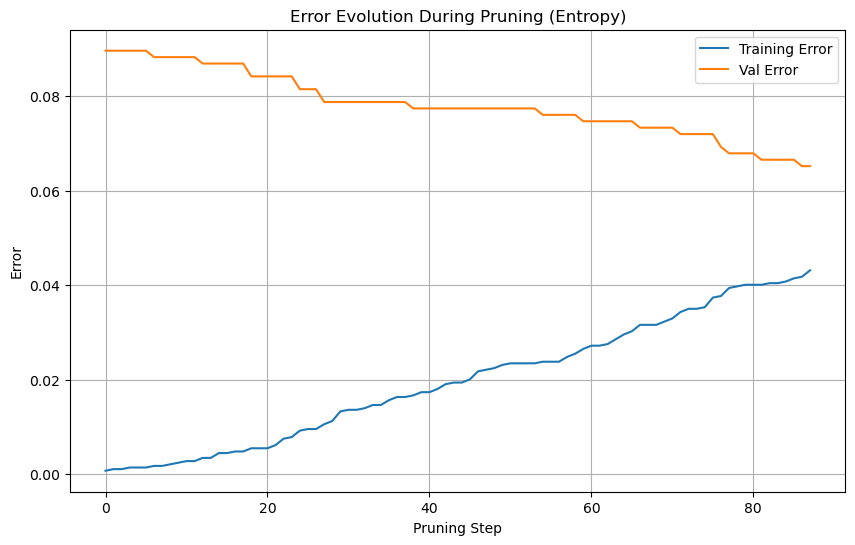

In [15]:
# Gini Criterion
dt_classifier_entropy = DecisionTreeClassifier(random_state=random, criterion="entropy")
dt_classifier_entropy.fit(X_train_split, y_train_split)

pruned_tree_entropy, error_history = reduced_error_pruning_with_tracking(
    dt_classifier_entropy, X_train_split, y_train_split, X_val, y_val
)
train_errors, val_errors = zip(*error_history)
plt.figure(figsize=(10, 6))
plt.plot(range(len(train_errors)), train_errors, label="Training Error")
plt.plot(range(len(val_errors)), val_errors, label="Val Error")
plt.xlabel("Pruning Step")
plt.ylabel("Error")
plt.title(f"Error Evolution During Pruning (Entropy)")
plt.legend()
plt.grid(True)
plt.show()

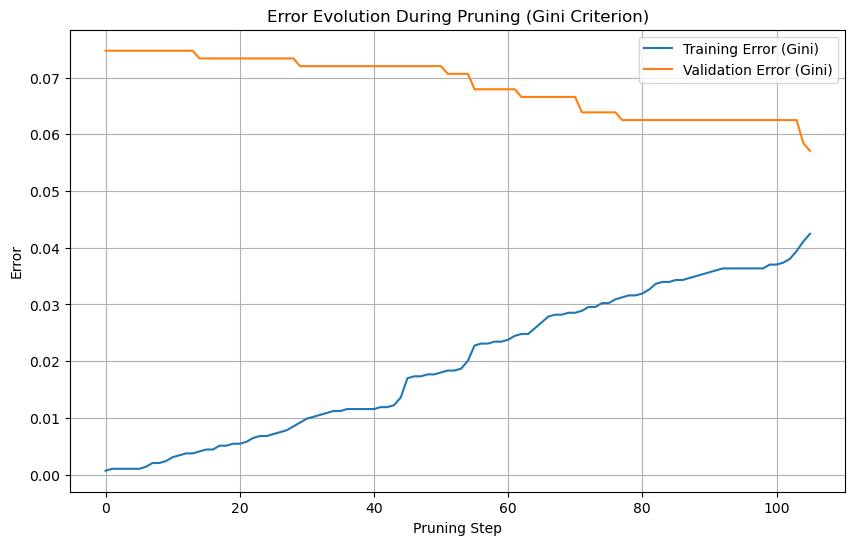

In [16]:
# Gini Criterion
dt_classifier_gini = DecisionTreeClassifier(random_state=random, criterion="gini")
dt_classifier_gini.fit(X_train_split, y_train_split)

# Perform reduced error pruning for Gini tree
pruned_tree_gini, error_history_gini = reduced_error_pruning_with_tracking(
    dt_classifier_gini, X_train_split, y_train_split, X_val, y_val
)

# Extract training and validation errors for plotting
train_errors_gini, val_errors_gini = zip(*error_history_gini)

# Plot error evolution during pruning for Gini
plt.figure(figsize=(10, 6))
plt.plot(range(len(train_errors_gini)), train_errors_gini, label="Training Error (Gini)")
plt.plot(range(len(val_errors_gini)), val_errors_gini, label="Validation Error (Gini)")
plt.xlabel("Pruning Step")
plt.ylabel("Error")
plt.title("Error Evolution During Pruning (Gini Criterion)")
plt.legend()
plt.grid(True)
plt.show()


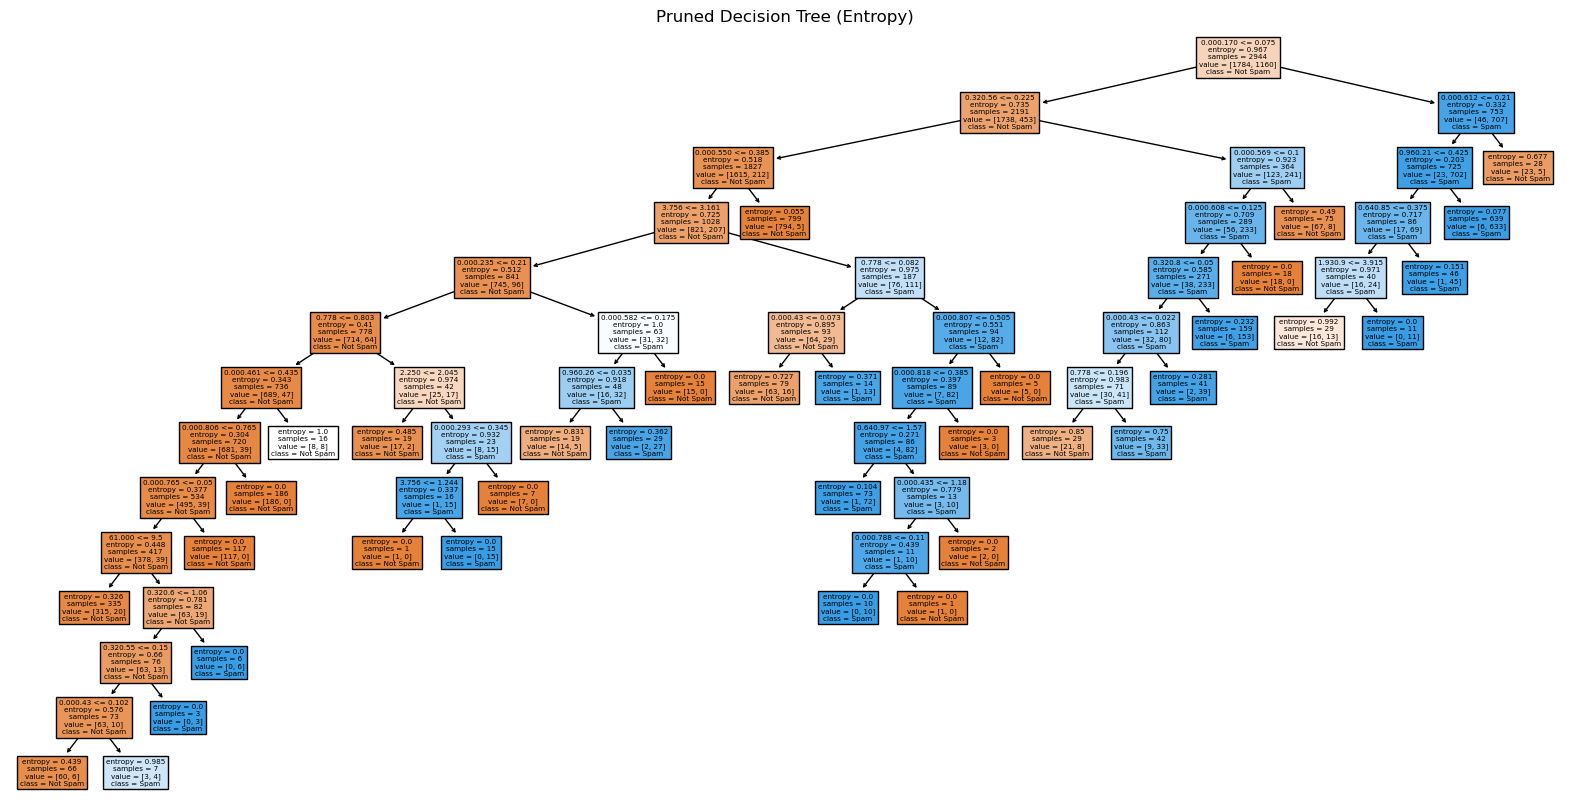

In [17]:
plt.figure(figsize=(20, 10))
plot_tree(pruned_tree_entropy, filled=True, feature_names=X.columns.tolist(), class_names=["Not Spam", "Spam"])
plt.title(f"Pruned Decision Tree (Entropy)")
plt.show()

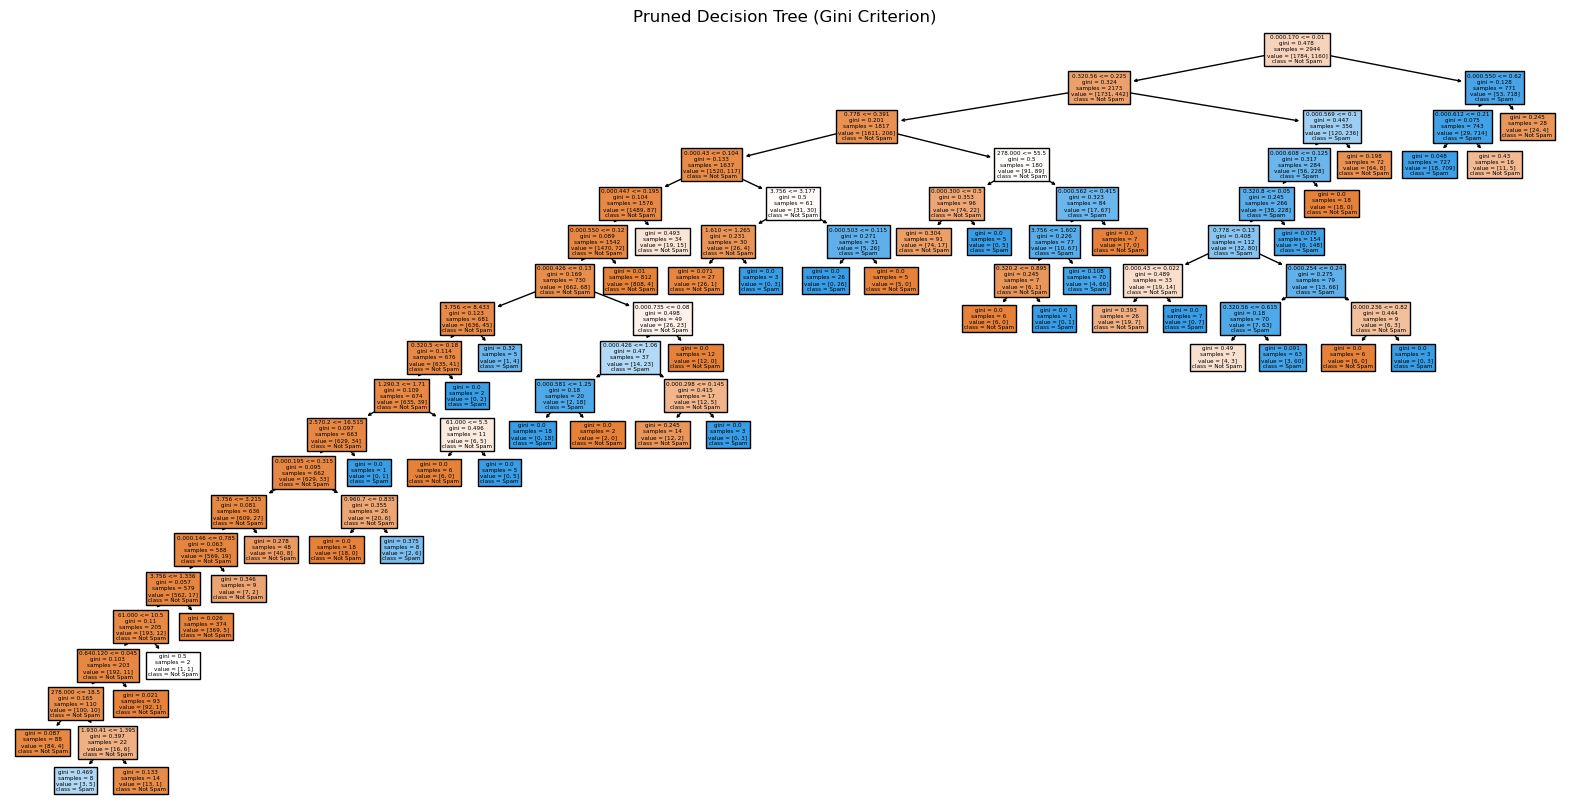

In [18]:
# Plot the pruned Gini decision tree
plt.figure(figsize=(20, 10))
plot_tree(pruned_tree_gini, filled=True, feature_names=X.columns.tolist(), class_names=["Not Spam", "Spam"])
plt.title("Pruned Decision Tree (Gini Criterion)")
plt.show()

In [19]:
# Evaluate the performance of the optimized Gini tree on the test data
gini_test_predictions = pruned_tree_gini.predict(X_test)
gini_test_error = 1 - accuracy_score(y_test, gini_test_predictions)

# Evaluate the performance of the optimized Entropy tree on the test data
entropy_test_predictions = pruned_tree_entropy.predict(X_test)
entropy_test_error = 1 - accuracy_score(y_test, entropy_test_predictions)

# Print test errors
print(f"Test Error (Optimized Gini): {gini_test_error:.4f}")
print(f"Test Error (Optimized Entropy): {entropy_test_error:.4f}")


Test Error (Optimized Gini): 0.0750
Test Error (Optimized Entropy): 0.0750
